<a href="https://colab.research.google.com/github/anirbanghoshsbi/.github.io/blob/master/experimental/Untitled31.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [112]:
import pandas as pd
import numpy as np
import re
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt

In [52]:
#!unzip '/content/nifty_F_data.zip' -d "/content/new_fldr/"

In [53]:
top='/content/new_fldr'

In [54]:
company_name=[]
import os
for root, dirs, files in os.walk(top, topdown=False):
    for name in dirs:
        company_name.append(os.path.join(root, name).split('/')[-1])

In [55]:
rejct=['GAEL','UJJIVANSFB','PFIZER','NESTLEIND','MAHABANK','BAJFINANCE','IDFC','HATSUN','CHOLAFIN'\
       ,'ABBOTINDIA','SBICARD','BASF','RELAXO','GILLETTE','IOB','TCIEXP','SPICEJET','POWERINDIA'\
       ,'M&MFIN','SCHAEFFLER','PNBHOUSING','PNB','SHRIRAMCIT','BHARATRAS','HDFCAMC','HUDCO',\
       'INDIANB','HDFC','HDFCBANK','LAOPALA','BANKINDIA','TCNSBRANDS','VINATIORGA','LICHSGFIN','JSLHISAR',\
       'ICICIGI','TASTYBITE','TIMKEN','GULFOILLUB','IOLCP','ADANITRANS','PRINCEPIPE','CASTROLIND',\
       'TATAMTRDVR','YESBANK','RBLBANK','ICICIBANK','CREDITACC','SANOFI','BURGERKING','SKFINDIA','SPARC',\
       'IRCTC','CANFINHOME','MGL','VMART','WABCOINDIA','HEIDELBERG','HONAUT','JCHAC','SUNDARMFIN','HINDZINC',\
       'KARURVYSYA','KPITTECH','PGHL','IDBI','KOTAKBANK','BANDHANBNK','VENKEYS','CENTRALBK','MANAPPURAM',\
       'INGERRAND','DCBBANK','MAHSCOOTER','BSE','SBIN','PGHH','UCOBANK','SRTRANSFIN','CSBBANK','TIINDIA',\
       'CANBK','CDSL','SCHNEIDER','IBULHSGFIN','BDL','CUB','BAYERCROP','IDFCFIRSTB','SBILIFE','HEMIPROP',\
       'AXISBANK','ABB','GRSE','ORIENTREF','FEDERALBNK','BANKBARODA','UNIONBANK']

In [56]:
company_name=[company for company in company_name if company != 'PAGEIND']
company_name=[company for company in company_name if company != 'AUBANK']
company_name=[company for company in company_name if company != 'INDUSINDBK']
company_name=[company for company in company_name if company != 'ORIENTELEC']
company_name=[company for company in company_name if company != 'ASTRAZEN']
company_name=[company for company in company_name if company not in rejct]

In [57]:
def calc_DSRI(df):
  ''' file name ---> _str(8)'''
  working_capital_cycle = pd.read_csv(df).T[1:]
  #print('done')
  working_capital_cycle.set_axis(['Debtor Days','Inventory Days','Days Payable','Cash Conversion Cycle','Working Cap Days','ROCE'],axis='columns',inplace=True)
  WC=working_capital_cycle[1:]
  WC=WC.reset_index()
  WC.rename(columns={'index':'Date'},inplace=True)
  WC=WC.set_index('Date')
  #print(WC.head(1))
  WC['Debtor Days']=WC['Debtor Days'].apply(lambda x:int(x))
  WC['DSRI']=WC['Debtor Days']/WC['Debtor Days'].shift(1)
  return WC

In [58]:
def calc_GMI_sales_DEPI(df):
  ''' file name ---> _str(1)'''
  bs = pd.read_csv(df).T[1:]
  columns =['Sales', 'Expenses', 'Operating Profit', 'OPM',\
        'Other Income', 'Interest', 'Depreciation', 'Profit before tax',\
        'Tax', 'Net Profit', 'EPS in Rs', 'Dividend Payout']
  bs=bs[1:]
  bs.columns=columns  
  bs=bs.reset_index()
  bs=bs.rename(columns={'index':'Date'})
  bs=bs.set_index('Date')
  bs['Operating Profit']=bs['Operating Profit'].apply(lambda x:int(x))
  bs['Sales']=bs['Sales'].apply(lambda x:int(x))
  bs['Depreciation']=bs['Depreciation'].apply(lambda x:int(x))
  bs['GMI']=bs['Operating Profit'].shift(1)/bs['Operating Profit']
  bs['SGI']=bs['Sales']/bs['Sales'].shift(1)
  bs['DEPI']=bs['Depreciation'].shift(1)/bs['Depreciation']
  bs['delta_Margin']=bs['Operating Profit']/bs['Sales']
  
  return bs

In [59]:
def get_column_header(path):
  bal = pd.read_csv(path).T[1:]
  my_list=np.squeeze(bal.head(1).values).tolist()
  cols=[re.sub('[^a-zA-Z0-9]+', '', _) for _ in my_list]
  return cols

In [60]:
def calc_LVGI(df):
  ''' file name ---> _str(6)'''
  bal = pd.read_csv(df).T[1:]
  columns= get_column_header(df)
  bal.columns=columns 
  bal=bal[1:] 
  bal=bal.reset_index()
  bal=bal.rename(columns={'index':'Date'})
  bal=bal.set_index('Date')
  #print(bal.head(2))
  bal['Borrowings']=bal['Borrowings'].astype('int')
  bal['ShareCapital']=bal['ShareCapital'].astype('int')
  bal['Reserves']=bal['Reserves'].astype('int')
  #print(bal['ShareCapital'].shape,bal['Reserves'].shape)
  bal['Equity']=bal['ShareCapital']+bal['Reserves']
  bal['DE']=bal['Borrowings']/bal['Equity']
  bal['LVGI']=bal['DE']/bal['DE'].shift(1)
  bal['AQI']=bal['OtherAssets'].astype('int')/bal['TotalAssets'].astype('int')
  return bal

In [61]:
def calc_TATA(path7,path1,path6):
  ''' pass path7= _str(7), path1= _str(1), path6= _str(6)'''
  cfo = pd.read_csv(path7).T[1:]
  columns=['Cash from Operating Activity',\
          'Cash from Investing Activity',\
          'Cash from Financing Activity', 'Net Cash Flow']
  cfo=cfo[1:]
  cfo=cfo.reset_index()
  cfo.rename(columns={'index':'Date'},inplace=True)
  cfo=cfo.set_index('Date')
  cfo.columns=columns
  snap=calc_GMI_sales_DEPI(path1)
  snap2=calc_LVGI(path6)
  cfo=pd.concat([cfo,snap['Net Profit'],snap2['TotalAssets']],axis=1)
  #print(cfo.head(2))
  cfo=cfo.fillna(0)
  cfo['Total Accruals']=cfo['Net Profit'].apply(lambda x:int(x))-cfo['Cash from Operating Activity'].apply(lambda x:int(x))
  cfo['TotalAssets']=cfo['TotalAssets'].apply(lambda x:int(x))
  cfo['TATA']=cfo['Total Accruals']/cfo['TotalAssets']
  cfo=cfo.drop(['Net Profit','TotalAssets'],axis=1)
  return cfo

In [62]:
def get_final_dataframe(path1,path6,path7,path8):
  cfo=calc_TATA(path7, path1, path6)
  lgvi=calc_LVGI(path6)
  dsri=calc_DSRI(path8)
  gmi=calc_GMI_sales_DEPI(path1)
  final_dataframe=pd.concat([cfo,lgvi,dsri,gmi],axis=1)
  return final_dataframe

In [63]:
def geo_mean(iterable):
    return np.exp(np.log(iterable).mean())

# Work in Progress 

In [64]:
def wonderful_business(df):
  df['return_on_asset']=df['Net Profit'].apply(lambda x:float(x))/df['TotalAssets'].apply(lambda x:float(x))
  df['Asset_Turn_Over_ratio'] =df['Net Profit'].apply(lambda x:float(x))/((df['TotalAssets'].shift(1).apply(lambda x:float(x)))+(df['TotalAssets'].apply(lambda x:float(x))))/2
  return df

In [65]:
def PMGr(df):
  df['Operating Profit']=df['Operating Profit'].apply(lambda x:float(x))
  df['GM']=df['Operating Profit'].shift(1)/df['Operating Profit']
  #print('\n Margin Growth \n ')
  margin_growth = geo_mean(final_dataframe['GM'][-9:-1].apply(lambda x:float(x)))
  #print(geo_mean(final_dataframe['GM'][-9:-1].apply(lambda x:float(x))))
  df['Price_Stability']=df['GM'].mean(axis=0)/df['GM'].std(axis=0)
  margin_stability=df['Price_Stability'][-1]
  #print('\n Margin Stability \n ')
  #print(df['Price_Stability'][-1])
  return df,margin_growth , margin_stability

In [66]:
def get_shares(path9):
  share=pd.read_csv(path9).T[1:]
  cols=get_column_header(path9)
  share.columns=cols
  share=share[1:]
  share['total']=share.sum(axis=1).values
  equity_repurchase=np.where(share['total'][-1]<share['total'][-2],1,0).tolist()
  return equity_repurchase

In [67]:
for serial,item in enumerate(company_name[:4]):
  print(item,serial)

IDEA 0
KPRMILL 1
PNCINFRA 2
GUJALKALI 3


In [68]:
final_placeholder={}
fun_placeholder={}
for serial,item in enumerate(company_name):
    print(item,serial)
    path7 = f'/content/new_fldr/{company_name[serial]}/_str(7)'
    path1 = f'/content/new_fldr/{company_name[serial]}/_str(1)'
    path6 = f'/content/new_fldr/{company_name[serial]}/_str(6)'
    path8=  f'/content/new_fldr/{company_name[serial]}/_str(8)'
    path9=  f'/content/new_fldr/{company_name[serial]}/_str(9)'
    final_dataframe=get_final_dataframe(path1,path6,path7,path8)
    final_dataframe=wonderful_business(final_dataframe)
    d,margin_growth,margin_safety=PMGr(final_dataframe)
    roa_pos=np.where(d['return_on_asset'][-3]>0,1,0).tolist()
    accrual_pos=np.where((d['Net Cash Flow'][-3]/d['TotalAssets'][-3])>0,1,0).tolist()
    fs_roa=np.where(d['return_on_asset'][-3]>d['return_on_asset'][-4],1,0).tolist()
    fcfta=np.where((d['Net Cash Flow'][-3]/d['TotalAssets'][-3])>(d['Net Cash Flow'][-4]/d['TotalAssets'][-4]),1,0).tolist()
    f_accrual=np.where(fcfta>fs_roa,1,0).tolist()
    lever=np.where(d['DE'][-3]>d['DE'][-4],0,1).tolist()
    liquid=np.where(d['Cash Conversion Cycle'][-3]<d['Cash Conversion Cycle'][-4],1,0).tolist()
    equity_repurchase=get_shares(path9)
    asset_turn=np.where(d['Asset_Turn_Over_ratio'].shift()>0,1,0)[-1].tolist()
    fs_margin= np.where(d['delta_Margin'][-3]>d['delta_Margin'][-4],1,0)
    ratios=pd.DataFrame({'Ratio_name':['margin_growth','margin_safety','ROA_pos','fcfta','accrual_pos','fs_roa','f_accrual','lever','liquid','equity_repurchase','asset_turn','fs_margin'],f'{company_name[serial]}':[margin_growth,margin_safety,roa_pos,fcfta,accrual_pos,fs_roa,f_accrual,lever,liquid,equity_repurchase,asset_turn,fs_margin]})
    ratios['company_name']=company_name[serial]
    final_placeholder[item]=ratios 
    rat=pd.DataFrame({'Ratio_name':['margin_growth','margin_safety','ROA','fcf','lever','liquid','equity_repurchase','asset_turn'],f'{company_name[serial]}':[margin_growth,margin_safety,d['return_on_asset'][-3],d['Net Cash Flow'][-3],d['DE'][-3],d['Cash Conversion Cycle'][-3],equity_repurchase,d['Asset_Turn_Over_ratio'][-1]]})
    rat['company_name']=company_name[serial]
    fun_placeholder[item]=rat
print('Done')

IDEA 0
KPRMILL 1
PNCINFRA 2
GUJALKALI 3
TRITURBINE 4
COALINDIA 5
CGCL 6
SHILPAMED 7
GUJGASLTD 8
CROMPTON 9
DBL 10
NBCC 11
DABUR 12
UTIAMC 13
APOLLOTYRE 14
BATAINDIA 15
IGL 16
RELIANCE 17
VALIANTORG 18
JKCEMENT 19
3MINDIA 20
JKPAPER 21
NMDC 22
NETWORK18 23
CENTURYPLY 24
DRREDDY 25
TVSMOTOR 26
CERA 27
IPCALAB 28
SJVN 29
KSB 30
RESPONIND 31
FLUOROCHEM 32
BAJAJCON 33
EIDPARRY 34
SUNDRMFAST 35
CADILAHC 36
APOLLOHOSP 37
PHILIPCARB 38
JYOTHYLAB 39
NH 40
KALPATPOWR 41
DHANI 42
IIFL 43
SFL 44
HAPPSTMNDS 45
TATACOMM 46
LT 47
EDELWEISS 48
LEMONTREE 49
EMAMILTD 50
RATNAMANI 51
CEATLTD 52
THYROCARE 53
CONCOR 54
ADANIPORTS 55
BSOFT 56
JBCHEPHARM 57
SIEMENS 58
BALAMINES 59
JAMNAAUTO 60
JUBLFOOD 61
TATASTEEL 62
EXIDEIND 63
TV18BRDCST 64
STAR 65
SUVENPHAR 66
RAIN 67
AIAENG 68
IEX 69
BPCL 70
WIPRO 71
VAIBHAVGBL 72
COCHINSHIP 73
VOLTAS 74
IRB 75
AJANTPHARM 76
PIIND 77
KSCL 78
INDIAMART 79
IBREALEST 80
STLTECH 81
MMTC 82
VGUARD 83
SYNGENE 84
ERIS 85
FINEORG 86
GLAXO 87
ITI 88
VSTIND 89
GALAXYSURF 90
JINDA

In [69]:
with open('final.csv', 'w') as f:
    for key in final_placeholder.keys():
        f.write("%s,%s\n"%(key,final_placeholder[key]))

In [113]:
def small_snippet(final_placeholder,item):
  com_c=final_placeholder[item]
  df=pd.DataFrame({item:com_c[item]}).T
  df.columns=com_c['Ratio_name'].values
  return df

In [114]:
lst=[]
for item in company_name:
  item=small_snippet(fun_placeholder,item)
  lst.append(item)

In [115]:
companies_in_final_list=pd.concat(lst)

In [116]:
companies_in_final_list=companies_in_final_list.fillna(0)

In [117]:
# Scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(companies_in_final_list.values)
# Printing pre-processed data
print(data_scaled)

[[ 1.61807147e-02 -4.41928657e-01 -3.45971667e+00 ... -1.42483384e-01
  -5.88015911e-01 -8.78579342e-02]
 [-9.94198253e-02 -1.69279432e-01  1.11983117e+00 ...  5.94190409e-02
  -5.88015911e-01 -8.78579342e-02]
 [-5.67782713e-01  1.77093440e-01 -1.78083201e-01 ... -2.16599464e-01
  -5.88015911e-01 -8.78579342e-02]
 ...
 [-7.83001618e-02 -1.43985220e-01 -5.64816076e-01 ... -1.91840457e-03
  -5.88015911e-01 -8.78579342e-02]
 [ 1.83047325e-01 -4.04284401e-01 -1.77806970e-01 ... -9.13688460e-02
  -5.88015911e-01 -8.78579342e-02]
 [ 1.41404486e-02 -1.12532521e+00 -4.67250490e-01 ... -2.31933825e-01
  -5.88015911e-01 -8.78579342e-02]]


In [120]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
    }
sse = []
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(data_scaled)
    sse.append(kmeans.inertia_)

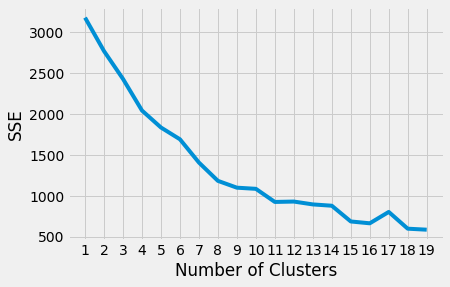

In [122]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 20), sse)
plt.xticks(range(1, 20))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [123]:
from sklearn.cluster import KMeans
km_model = KMeans(n_clusters=15).fit(data_scaled)

In [124]:
clusters = km_model.labels_
companies_in_final_list['cluster'] = clusters
companies_in_final_list

,margin_growth,margin_safety,ROA,fcf,lever,liquid,equity_repurchase,asset_turn,cluster
IDEA,0.919094,2.583560,-0.217385,-17,-0.768520,22,0,0.0,2
KPRMILL,0.887904,3.650091,0.158413,-84,0.279574,180,0,0.0,7
PNCINFRA,0.761532,5.005009,0.051906,1,1.371765,-36,0,0.0,5
GUJALKALI,0.954495,1.879648,0.023204,313,0.092482,21,0,0.0,5
TRITURBINE,0.977091,2.072131,0.107595,-29,0.001570,134,1,0.0,4
...,...,...,...,...,...,...,...,...,...
FSL,0.892443,4.624768,0.075685,-53,0.426581,41,0,0.0,5
TANLA,0.707414,0.300647,0.220707,384,0.004474,58,1,0.0,14
JINDALSAW,0.893602,3.749035,0.020171,379,0.763998,132,0,0.0,5
SCI,0.964118,2.730815,0.051929,-20,0.450416,62,0,0.0,5


In [125]:
companies_in_final_list.reset_index(inplace=True)

In [126]:
companies_in_final_list.rename(columns={'index':'company_name'},inplace=True)

In [127]:
companies_in_final_list

,company_name,margin_growth,margin_safety,ROA,fcf,lever,liquid,equity_repurchase,asset_turn,cluster
0,IDEA,0.919094,2.583560,-0.217385,-17,-0.768520,22,0,0.0,2
1,KPRMILL,0.887904,3.650091,0.158413,-84,0.279574,180,0,0.0,7
2,PNCINFRA,0.761532,5.005009,0.051906,1,1.371765,-36,0,0.0,5
3,GUJALKALI,0.954495,1.879648,0.023204,313,0.092482,21,0,0.0,5
4,TRITURBINE,0.977091,2.072131,0.107595,-29,0.001570,134,1,0.0,4
...,...,...,...,...,...,...,...,...,...,...
392,FSL,0.892443,4.624768,0.075685,-53,0.426581,41,0,0.0,5
393,TANLA,0.707414,0.300647,0.220707,384,0.004474,58,1,0.0,14
394,JINDALSAW,0.893602,3.749035,0.020171,379,0.763998,132,0,0.0,5
395,SCI,0.964118,2.730815,0.051929,-20,0.450416,62,0,0.0,5


In [128]:
gp=companies_in_final_list.groupby('cluster')


In [129]:
gp.first()

,company_name,margin_growth,margin_safety,ROA,fcf,lever,liquid,equity_repurchase,asset_turn
cluster,,,,,,,,,
0,DABUR,0.923942,15.907660,0.156282,97,0.066414,3,0,0.00000
1,BRIGADE,0.908698,3.386567,-0.003330,84,2.164107,8861,1,0.00000
2,IDEA,0.919094,2.583560,-0.217385,-17,-0.768520,22,0,0.00000
3,INDIGO,2.922485,0.409546,-0.134863,-210,284.380952,5,1,0.00000
4,TRITURBINE,0.977091,2.072131,0.107595,-29,0.001570,134,1,0.00000
5,PNCINFRA,0.761532,5.005009,0.051906,1,1.371765,-36,0,0.00000
6,COLPAL,0.855980,7.430429,0.323731,33,0.029762,-132,0,0.12886
7,KPRMILL,0.887904,3.650091,0.158413,-84,0.279574,180,0,0.00000
8,BPCL,0.915254,2.965242,0.100411,7000,1.014983,33,0,0.00000


In [130]:
gp.size()

cluster
0      10
1       4
2      31
3       1
4      48
5     156
6       1
7      84
8       7
9       2
10      1
11      1
12      1
13      3
14     47
dtype: int64

In [134]:
companies_in_final_list[companies_in_final_list['cluster']>8]

,company_name,margin_growth,margin_safety,ROA,fcf,lever,liquid,equity_repurchase,asset_turn,cluster
9,CROMPTON,0.912168,15.033290,0.170583,238,0.247930,10,1,0.000000,14
13,UTIAMC,0.800034,2.401720,0.134789,87,0.000000,14,1,0.000000,14
17,RELIANCE,0.883308,5.558208,0.037216,-13523,0.409868,-19,1,0.000000,9
27,CERA,0.946587,6.225591,0.073295,7,0.088565,88,1,0.000000,14
29,SJVN,0.993713,5.110423,0.094202,-267,0.169963,77,1,0.000000,14
36,CADILAHC,0.878016,5.250508,0.089796,-90,0.352833,148,1,0.000000,14
41,KALPATPOWR,0.905616,8.817128,0.043796,29,0.843274,-48,1,0.000000,14
45,HAPPSTMNDS,0.626188,3.484434,0.177049,42,0.353480,58,1,0.000000,14
46,TATACOMM,0.912861,4.889757,0.058716,-32,99.078261,56,0,0.000000,12
55,ADANIPORTS,0.863016,6.271515,0.067086,-2994,1.133435,85,1,0.000000,14


In [132]:
companies_in_final_list[companies_in_final_list['cluster']==0]

,company_name,margin_growth,margin_safety,ROA,fcf,lever,liquid,equity_repurchase,asset_turn,cluster
12,DABUR,0.923942,15.907660,0.156282,97,0.066414,3,0,0.0,0
18,VALIANTORG,0.954711,14.978204,0.131279,5,0.415507,45,0,0.0,0
71,WIPRO,0.934903,12.905154,0.130756,2556,0.190361,56,0,0.0,0
84,SYNGENE,0.896439,35.481875,0.082941,130,0.316554,-69,1,0.0,0
118,ATGL,0.808634,23.786557,0.144507,-78,0.273526,-8,0,0.0,0
210,ASIANPAINT,0.893757,20.653393,0.154213,2492,0.085351,59,0,0.0,0
241,EPL,0.937484,16.419398,0.079826,-75,0.379270,70,0,0.0,0
246,OFSS,0.927115,13.019882,0.216117,363,0.010220,59,0,0.0,0
300,HINDUNILVR,0.889423,17.188135,0.116308,-1374,0.000000,-81,0,0.0,0
363,BERGEPAINT,0.867723,22.297547,0.121663,57,0.187741,79,0,0.0,0


In [133]:
companies_in_final_list[companies_in_final_list['cluster']==3]

,company_name,margin_growth,margin_safety,ROA,fcf,lever,liquid,equity_repurchase,asset_turn,cluster
236,INDIGO,2.922485,0.409546,-0.134863,-210,284.380952,5,1,0.0,3
